# Day 01 - Visual Data Exploration 

Today's workshop will cover the following topics:

- Intro to matplotlib for visualization (the pyplot API)
- Data Frames for visual exploration
- Pandas plotting API
- Seaborn for visual statistical analysis

The schedule is as follows: 

- Introduction to matplotlib (35 mins) 
- Introduction to Pandas (35 mins)
- Introduction to Seaborn (30 mins) 
- Guided Workshop (40 mins) 

## matplotlib 

matplotlib is a 2D Python plotting library that is meant to create _publication quality figures_ in both hardcopy and interactive environments. It is the cornerstone of data visualization in Python and as a result is a fiscally sponsored project of the [NumFocus](http://www.numfocus.org/) organization. matplotlib is: 

- Open Source and Free 
- Platform Agnostic
- A General Visual Framework 
- Optimized for Scientific Visualization 

The primary way to interact with matplotlib is through the `pyplot` API, which replaced the more proceedural `pylab` API which was intended to emulate MATLAB graphics commands. (**Note:** the `pylab` API is no longer supported and you shouldn't use it). The `pyplot` API is a _simple_ interface to the drawing components provided by matplotlib, as shown in the component architecture below:

![The matplotlib Component Model](figures/matplotlib_components.png)

<p><center><small>The above figure is from McGreggor, Duncan M. _Mastering matplotlib_. Packt Publishing Ltd, 2015.</small></center></p>

In this notebook we'll explore using matplotlib in noteboook mode. This allows simple interaction of the kind that is provided in the Tk window mode, which I'll also demonstrate. In order to set matplotlib's mode, we must use the Jupyter notebook magic functions:

    %matplotlib notebook 
    %matplotlib inline 
    
Note: the matplotlib inline function simply renders the figure created by the cell as a static image. This is useful for notebooks who you expect to "run all" cells routinely. Note also that this affects both Pandas and Seaborn rendering as well. 

The best thing for the magic function to work is to have it first thing in the notebook, we'll also import our packages into the namespace using the standard short names:

In [ ]:
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt 

matplotlib comes with default functions that allow customizing nearly every part of the figure. This is both a benefit and a barrier: you have fine grained control at the cost of copmlexity. Generally speaking the matplotlib defaults are good, considering visibility for colorblind folks, printing in black and white, etc. Importantly in the upcoming 2.0 release, the styles are going to be updated to look even better. 

The basic interaction of matplotlib is to pass data to functions in the `plt` module:

In [ ]:
# Create the X data points as a numpy array 
X = np.linspace(-10, 10, 255)

# Compute two quadratic functions 
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

plt.plot(X, Y1)
plt.plot(X, Y2)

The `plt.plot` function does a lot of work on our behalf: it initializes the figure, creates a subplot with axes, then computes and draws two `Line2D` objects. Because we're in `notebook` mode, the current figure is displayed in an interactive fashion and can be explored until "shutdown". 

Key points:

- There is a global figure that is drawn on 
- The objects that are returned from these functions can be directly manipulated 
- Outside of a notebook nothing will be rendered until `plt.show` 

Just note, to get the same functionality in a Python script you'll have to tell `pyplot` to render the figure, either to an interactive backend like Tk or to an image, either raster or SVG:

    plt.show() 
    plt.savefig('myfig.pdf') 

The goal of `pyplot` has always been to give as simple plotting functions as possible, so that figures can be drawn without much effort. In practice, it is easy to get simple graphs plotted, but much tougher to configure them as needed. 

Let's now look at all the steps it would take to draw this from scratch, which also demonstrate the configuration control you have over the figure.

In [ ]:
# Create a new figure of size 8x6 points, using 72 dots per inch 
plt.figure(figsize=(8,6), dpi=72)

# Create a new subplot from a 1x1 grid 
plt.subplot(111)

# Create the data to plot 
X = np.linspace(-10, 10, 255)
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

# Plot the first quadratic using a blue color with a continuous line of 1px
plt.plot(X, Y1, color='blue', linewidth=1.0, linestyle='-')

# Plot the second quadratic using a green color with a continuous line of 1px
plt.plot(X, Y2, color='green', linewidth=1.0, linestyle='-')

# Set the X limits 
plt.xlim(-10, 10)

# Set the X ticks 
plt.xticks(np.linspace(-10, 10, 9, endpoint=True))

# Set the Y limits 
plt.ylim(0, 350)

# Set the Y ticks 
plt.yticks(np.linspace(0, 350, 5, endpoint=True))

# Save the figure to disk 
plt.savefig("figures/quadratics.png")

In [ ]:
# Create the data to plot 
# This data will be referenced for the next plots below
# For Jupyter notebooks, pay attention to variables! 

X = np.linspace(-10, 10, 255)
Y1 = 2*X ** 2 + 10
Y2 = 3*X ** 2 + 50 

We'll look at each of these steps in detail in the next few boxes.

### Colors and style 

We can directly pass colors and style to each of the drawing functions in the `pyplot` API. The arguments for color and linestyle can either be full words, e.g. "blue" or "dashed" or they can be shortcodes, for example 'b' or '--'. 

The color cycle in matplotlib determines which colors will be used for each new element drawn to the graph. The cycle is keyed to the short codes: 'bgrmyck' which stands for:

    blue green red maroon yellow cyan key 
    
A quick visualization of these colors is as follows:

In [ ]:
from matplotlib.colors import ListedColormap

colors = 'bgrmyck'
fig, ax = plt.subplots(1, 1, figsize=(7, 1))
ax.imshow(np.arange(7).reshape(1,7), cmap=ListedColormap(list(colors)), interpolation="nearest", aspect="auto")
ax.set_xticks(np.arange(7) - .5)
ax.set_yticks([-0.5,0.5])
ax.set_xticklabels([])
ax.set_yticklabels([])

The default style is currently 'ggplot' -- though this is going to be updated soon. You can set the style of the graphs, or even provide your own CSS style sheet with the `plt.style.use` function: 

In [ ]:
# plt.style.use('fivethirtyeight')

# Note that I'm going to use temporary styling so I don't mess up the notebook! 
with plt.style.context(('fivethirtyeight')):
    plt.plot(X, Y1)
    plt.plot(X, Y2)

In [ ]:
# To see the available styles:
for style in plt.style.available: print("- {}".format(style))

Note also that styles can be composed together by passing a list. Styles farther to the right will override styles to the left. 

Line styles can be set using the following shortcodes (note that marker styles for scatter plots can also be set using filled and point shortcodes):

![Line Styles](figures/linestyles.png)

So back to our original graphs we can convert the figure to have different colors and styles:

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-")

We can also change the x and y limits to put some space into out graph:

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(Y1.min()*-1.1, Y2.max()*1.1)

We can add a legend and a title:

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-", label="Y1")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-", label="Y2")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(Y1.min()*-1.1, Y2.max()*1.1)

plt.title("Two Quadratic Curves")
plt.legend(loc='best')

And annotate some po ints on our graph:

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(X, Y1, color="b", linewidth=2.5, linestyle="-", label="Y1")
plt.plot(X, Y2, color="r", linewidth=2.5, linestyle="-", label="Y2")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(0, Y2.max()*1.1)

plt.title("Two Quadratic Curves")
plt.legend(loc='best')

# Annotate the blue line 
x = 6 
y = 2*x ** 2 + 10
plt.plot([x,x], [0, y], color='blue', linewidth=1.5, linestyle='--')
plt.scatter([x,], [y,], color='blue', s=50, marker='D')

plt.annotate(
    r'$2x^2+10={}$'.format(y), xy=(x,y), xycoords='data', xytext=(10,-50), 
    fontsize=16, textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

# Annotate the red line
x = -3
y = 3*x ** 2 + 50
plt.plot([x,x], [0, y], color='red', linewidth=1.5, linestyle='--')
plt.scatter([x,], [y,], color='red', s=50, marker='s')

plt.annotate(
    r'$3x^2+50={}$'.format(y), xy=(x,y), xycoords='data', xytext=(10,50), 
    fontsize=16, textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

### Figures, Subplots, and Axes 

The figure is the GUI window that displays the entirety of the drawing. Figures are numbered starting from 1, and each new plot has its own figure. Generally speaking though you're only working on one global figure at a time. Figures have several properties that can be configured:

- **num**: the number of the figure. 
- **figsize**: the size of the figure in inches (width, height)
- **dpi**: resolution in dots per inch
- **facecolor**: the color of the drawing background 
- **edgecolor**: the color of the edge around the drawing background
- **frameon**: draw the figure frame or not 

Subplots allow you to arrange plots in a rectangular grid. They are specified by the rows and columns as well as the number of the plot (e.g. it's id). The [gridspec](http://matplotlib.sourceforge.net/users/gridspec.html) command gives a much more controlled alternative. 

![horizontal](figures/subplot-horizontal.png)

![vertical](figures/subplot-vertical.png)

![grid](figures/subplot-grid.png)

Axes are very similar to subplots but allow placement of plots at any location in the figure. This allows more fine grained plot within a plot control, but also the addition of complex images, for example colorbars for heatmaps. Because axes are the primary drawing space, they can also be worked on directly, usually with the `set_[]` style command. 

![axes](figures/axes.png)

![axes](figures/axes-2.png)

There are many more commands, more than we can cover in the section. But we'll view them more specifically using Pandas and Seaborn. 

## Pandas

Pandas is an open source Python library that provides high performance _data structures_ for data analysis, in particular the `Series` and `DataFrame` objects. The focus today is not on Pandas, however, but rather on its plotting library. 

Pandas' plotting library is essentially a wrapper around matplotlib that uses information from the `DataFrame` and series objects in order to provide more detail. 

In [ ]:
import pandas as pd

In [ ]:
# Create a random timeseries object 
ts = pd.Series(np.random.randn(365), index=pd.date_range('1/1/2010', periods=365))
ts = ts.cumsum()
ts.plot() 

Note that `series.plot` and `df.plot` are not exactly the same thing as matplotlib, but in many cases do take the exact same arguments. Let's look at a few Pandas's specific arguments:

In [ ]:
df = pd.DataFrame(np.random.randn(365, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot();

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df['A'] = pd.Series(list(range(len(df))))
df.plot(x='A', y='B')

The `kind` argument allows you to specify a wide variety of plots for data:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or 'density' for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar')

In [ ]:
df2.plot.bar(stacked=True)

In [ ]:
df2.plot(kind='area')

In [ ]:
df2.plot.area(stacked=False)

In [ ]:
df3 = pd.DataFrame(np.random.rand(25, 4), columns=['a', 'b', 'c', 'd'])
ax = df3.plot.scatter(x='a', y='b', color='r', label="B")
df3.plot.scatter(x='a', y='c', color='c', ax=ax, label="C")
df3.plot.scatter(x='a', y='d', color='g', ax=ax, label="D")

In [ ]:
# Add new dimensions such as color and size based on other attributes in the data frame
# This creates a bubble plot, points sized based on the 'C' attribute and colors based on 'D'.
df3.plot.scatter(x='a', y='b', c=df3['d'], s=df3['c']*200);

Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

### Higher Dimensional Data Visualization 

We've already seen that attributes of the plot can allow us to increase the amount of information we add; however we typically say that only 7 attributes can be embedded into a plot:

- space (possibly in three dimensions)
- color
- size
- shape 
- time (slider)

Pandas does provide some interesting visualizations for higher dimensional work, though, including SPLOMs, Radviz, and Parallel coordinates

In [ ]:
# Load the data
import os 

DATA = os.path.join("data", "wheat", "seeds_dataset.txt")

FEATURES  = [
    "area",
    "perimeter",
    "compactness",
    "length",
    "width",
    "asymmetry",
    "groove",
    "label"
]

LABEL_MAP = {
    1: "Kama",
    2: "Rosa",
    3: "Canadian",
}

# Read the data into a DataFrame
df = pd.read_csv(DATA, sep='\s+', header=None, names=FEATURES)

# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.ix[df.label == k, 'label'] = v

# Describe the dataset
print(df.describe())

In [ ]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(df.groupby('label')['label'].count())

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(9,9), diagonal='kde')

In [ ]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(9,9))
parallel_coordinates(df, 'label')

In [ ]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(9,9))
radviz(df, 'label')

## Seaborn 

Seaborn is a _statistical_ visualization library, meaning that it embeds both models and data into visualizations, and is intended for visual statistical analysis. It is currently free and open source, written by Michael Waskom while he was at Stanford university. 

Similar to Pandas, Seaborn wraps matplotlib, and even wraps data frames - but provides higher level abstractions for a bunch of different plots and configurations. 

In [5]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns

IRIS = os.path.join("data", "iris.csv")
data = pd.read_csv(IRIS)

sns.set_style('darkgrid')
sns.set_palette('deep')
sns.set_context('notebook')

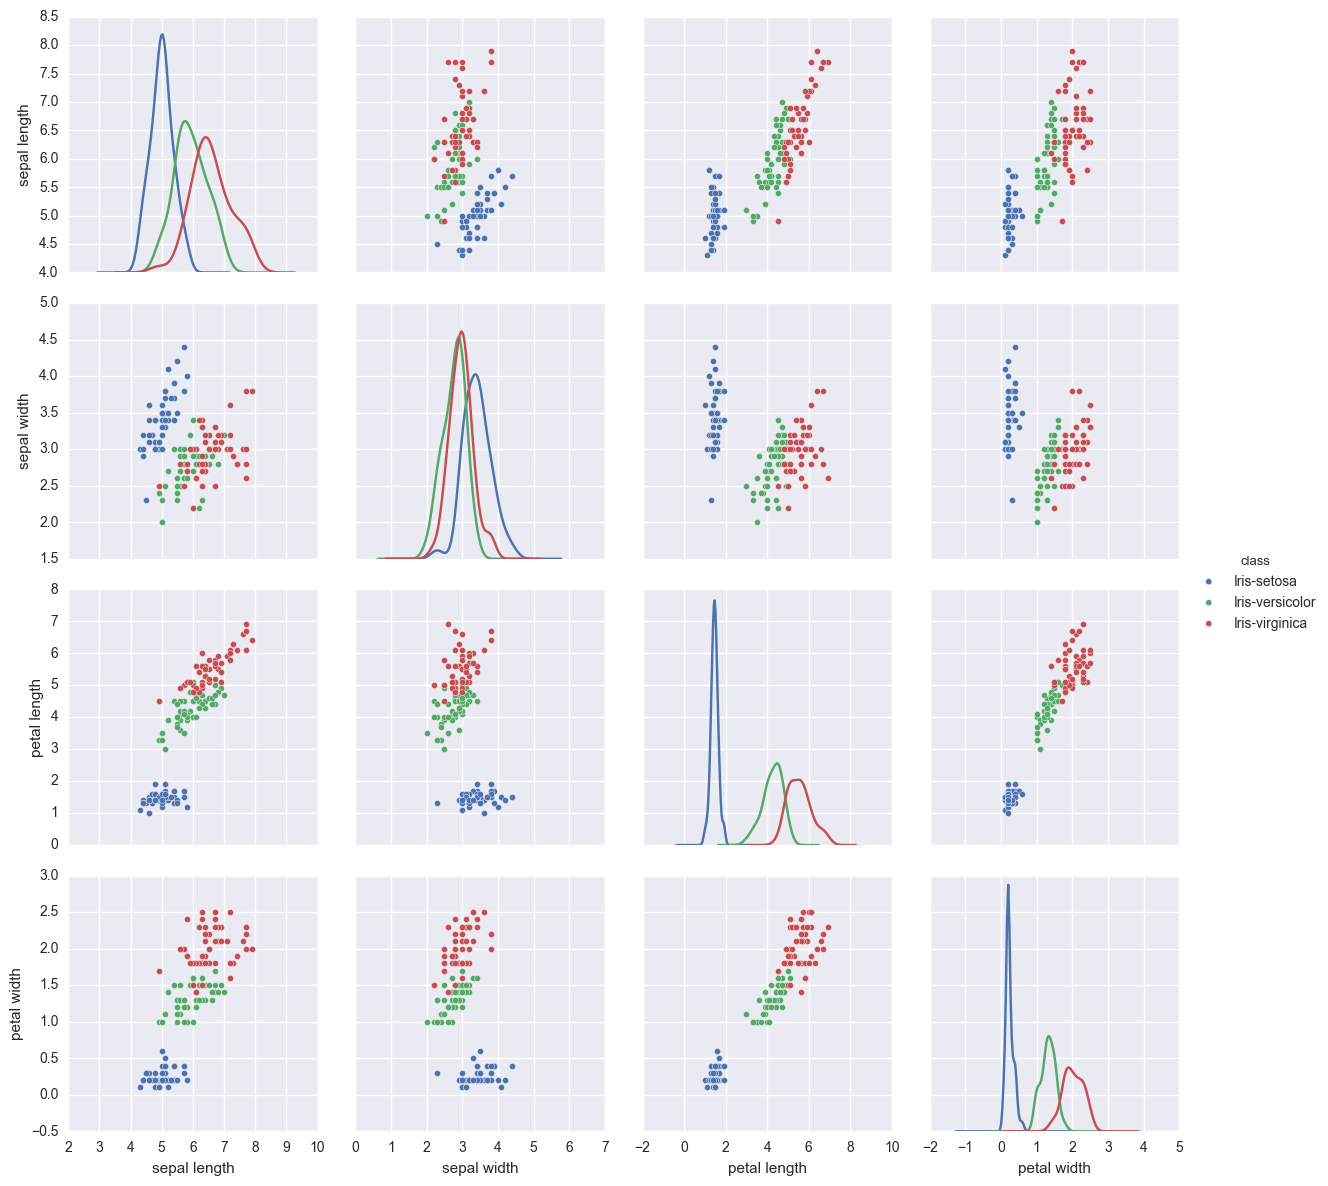

In [6]:
sns.pairplot(data, hue='class', diag_kind="kde", size=3)

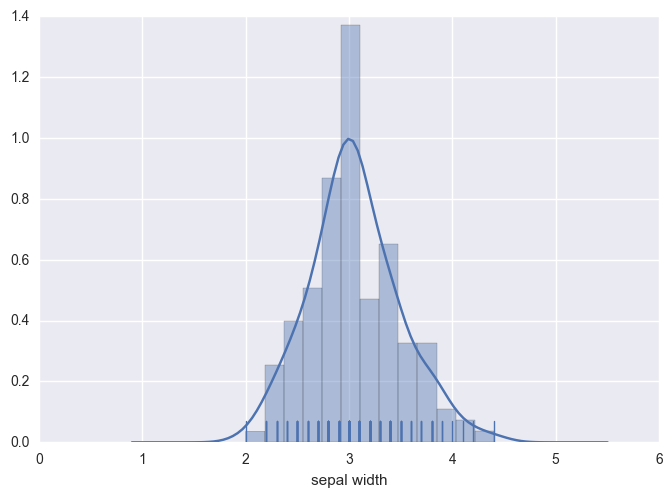

In [7]:
sns.distplot(data['sepal width'], rug=True)

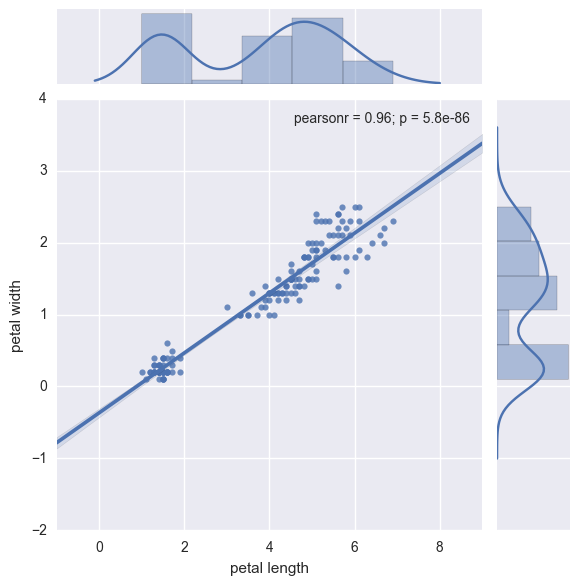

In [8]:
sns.jointplot("petal length", "petal width", data=data, kind='reg', size=6)

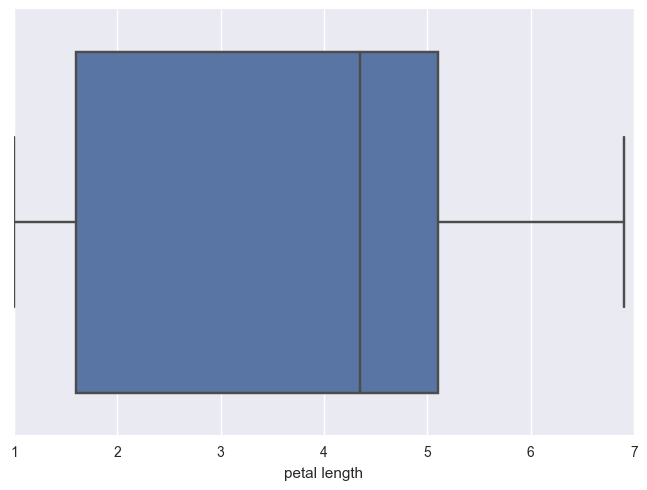

In [9]:
sns.boxplot(x='petal length', data=data)

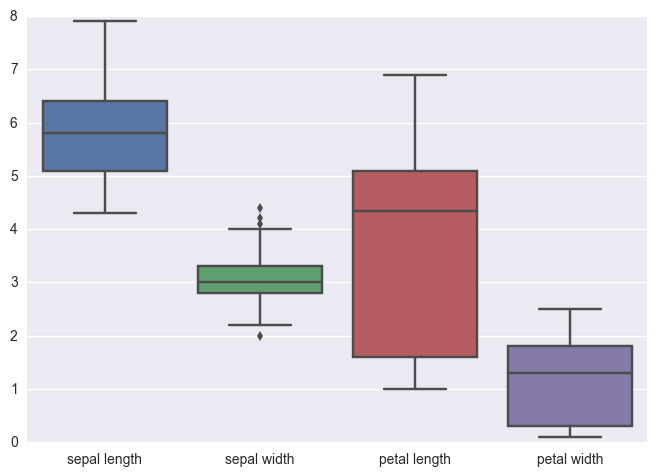

In [10]:
sns.boxplot(data=data)

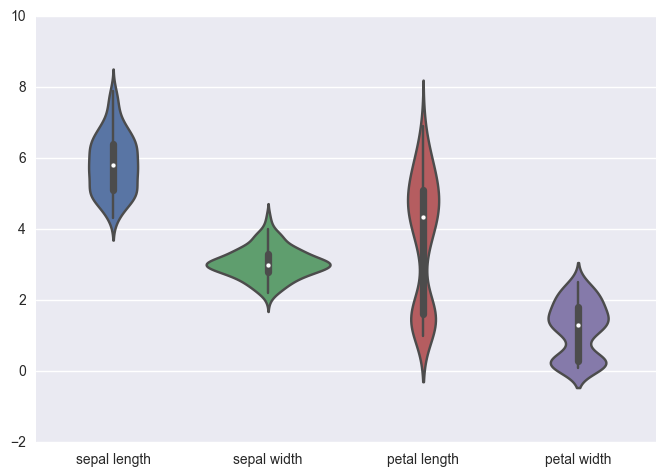

In [13]:
sns.violinplot(data=data)

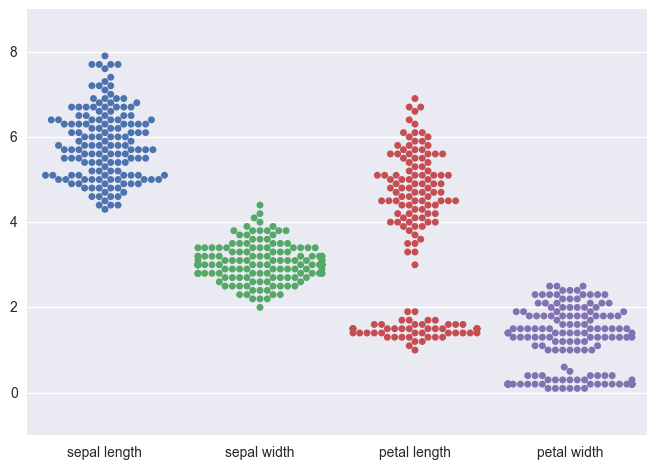

In [14]:
sns.swarmplot(data=data)

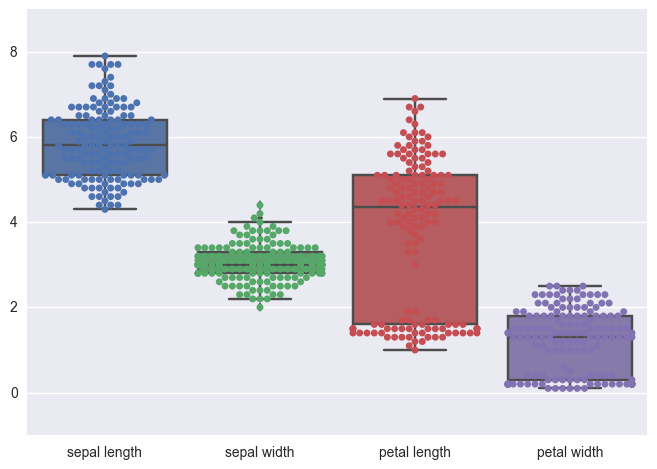

In [25]:
ax = sns.boxplot(data=data)
ax = sns.swarmplot(data=data)

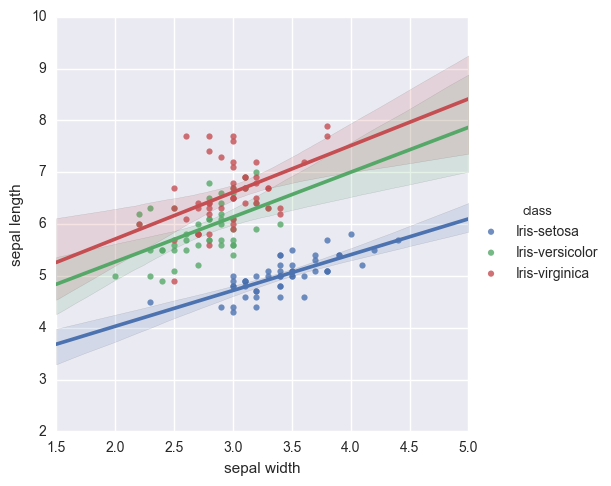

In [27]:
sns.lmplot(x="sepal width", y="sepal length", hue="class", data=data)

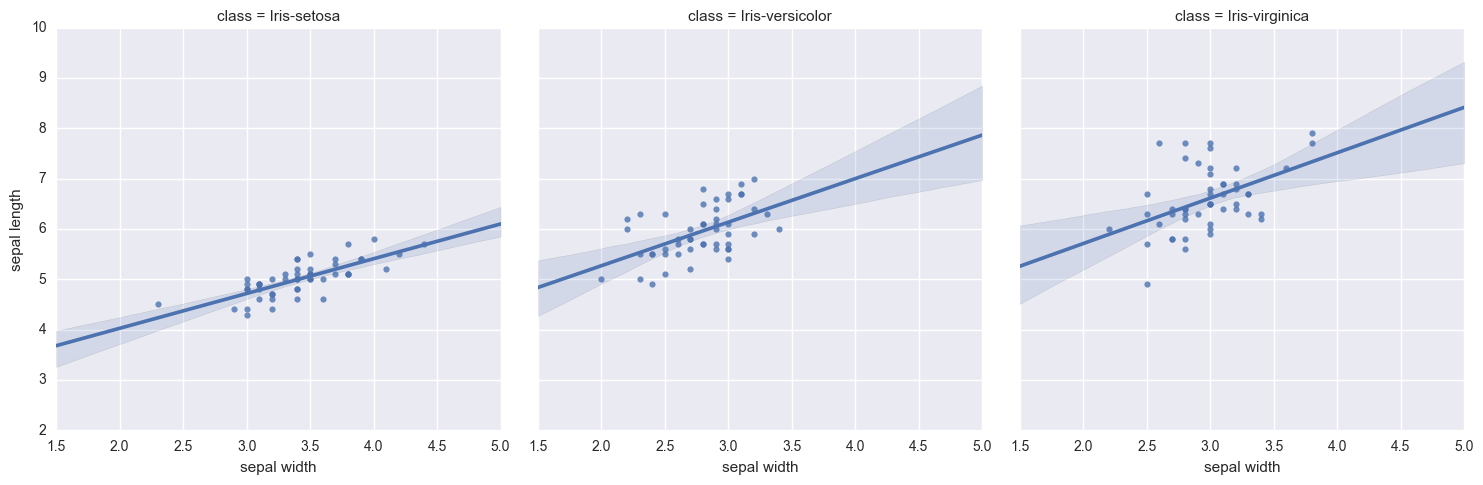

In [28]:
sns.lmplot(x="sepal width", y="sepal length", col="class", data=data)

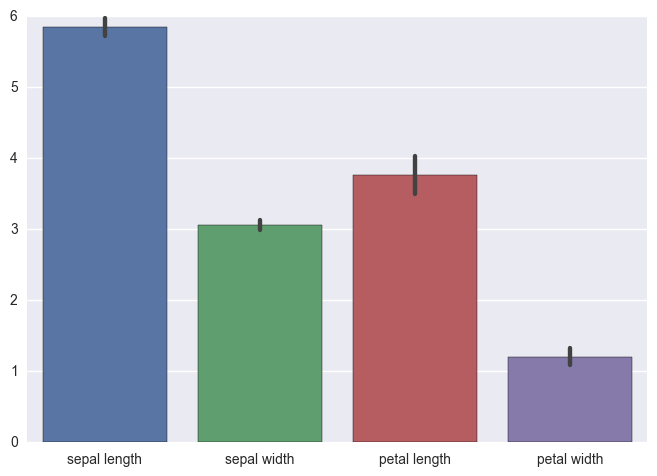

In [34]:
sns.barplot(data=data)

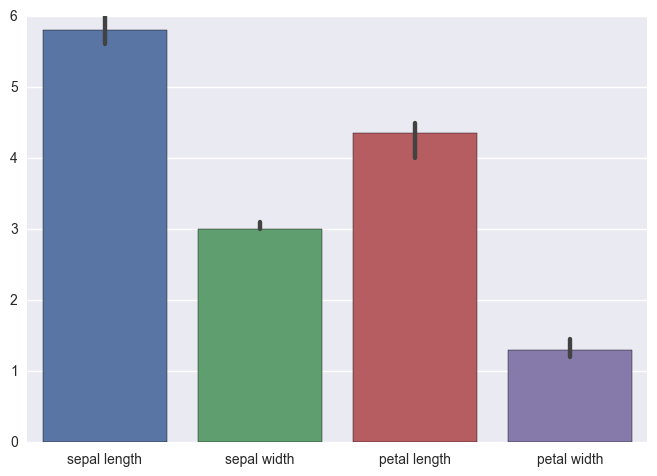

In [38]:
import numpy as np
sns.barplot(data=data, estimator=np.median)